# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


# Import API key
import api_keys
api_key = api_keys.api_key
#print(api_key)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_temp = []
cnt = 0
city_name = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
set_cnt = 0
rec_cnt = 0
fails = 0


for city in cities:
    cnt = cnt + 1
    if (cnt % 50 == 0 and cnt >= 50):
        set_cnt += 1
        print("Set Count =" + str(set_cnt))
        print("Count =" + str(cnt))
        rec_cnt = 0
        time.sleep(5)
    try:
        query_url = url + units + "&APPID=" + api_key + "&q=" + city
        #print(query_url)
        response = requests.get(query_url).json()
        #pprint(response)
        print ("Processing reccord" + " " + str(cnt) +" " + city)
        city_temp.append(response['main']["temp"])
        city_name.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        rec_cnt += 1
        
    except:
        print("City not found. Skipping...")
        fails += 1
        print("Failed = " + str(fails))
        #pass

Processing reccord 1 cape town
Processing reccord 2 tecoanapa
Processing reccord 3 grand gaube
Processing reccord 4 rikitea
Processing reccord 5 albany
Processing reccord 6 dingle
Processing reccord 7 souillac
Processing reccord 8 berdigestyakh
Processing reccord 9 amderma
City not found. Skipping...
Failed = 1
Processing reccord 10 mount isa
Processing reccord 11 eydhafushi
Processing reccord 12 hilo
Processing reccord 13 qaanaaq
Processing reccord 14 vaitupu
City not found. Skipping...
Failed = 2
Processing reccord 15 mys shmidta
City not found. Skipping...
Failed = 3
Processing reccord 16 aripuana
Processing reccord 17 atuona
Processing reccord 18 skelleftea
Processing reccord 19 nizhneyansk
City not found. Skipping...
Failed = 4
Processing reccord 20 butaritari
Processing reccord 21 esperance
Processing reccord 22 mataura
Processing reccord 23 otane
Processing reccord 24 krasnyy yar
Processing reccord 25 haimen
Processing reccord 26 hualmay
Processing reccord 27 cabo san lucas
Proc

Processing reccord 223 sena madureira
Processing reccord 224 ribeira grande
Processing reccord 225 chukhloma
Processing reccord 226 dzaoudzi
Processing reccord 227 ucar
Processing reccord 228 robertsport
Processing reccord 229 kamenskoye
City not found. Skipping...
Failed = 27
Processing reccord 230 port alfred
Processing reccord 231 utiroa
City not found. Skipping...
Failed = 28
Processing reccord 232 puerto suarez
Processing reccord 233 henties bay
Processing reccord 234 temirtau
Processing reccord 235 sorland
Processing reccord 236 narsaq
Processing reccord 237 hirara
Processing reccord 238 usagara
Processing reccord 239 paamiut
Processing reccord 240 eureka
Processing reccord 241 ancud
Processing reccord 242 rock springs
Processing reccord 243 luderitz
Processing reccord 244 samoylovka
Processing reccord 245 dom pedro
City not found. Skipping...
Failed = 29
Processing reccord 246 belushya guba
City not found. Skipping...
Failed = 30
Processing reccord 247 tigil
Processing reccord 2

Processing reccord 442 kavaratti
Processing reccord 443 rafai
Processing reccord 444 daru
Processing reccord 445 billings
Processing reccord 446 batagay
Processing reccord 447 aklavik
Processing reccord 448 banamba
Processing reccord 449 mango
Set Count =9
Count =450
Processing reccord 450 komsomolskiy
Processing reccord 451 te anau
Processing reccord 452 longhua
Processing reccord 453 hwange
Processing reccord 454 akyab
City not found. Skipping...
Failed = 54
Processing reccord 455 ebebiyin
Processing reccord 456 half moon bay
Processing reccord 457 jutai
Processing reccord 458 kuche
City not found. Skipping...
Failed = 55
Processing reccord 459 pangnirtung
Processing reccord 460 los llanos de aridane
Processing reccord 461 petropavlovsk-kamchatskiy
Processing reccord 462 sabang
Processing reccord 463 bolpur
Processing reccord 464 bud
Processing reccord 465 marcona
City not found. Skipping...
Failed = 56
Processing reccord 466 murashi
Processing reccord 467 kulhudhuffushi
Processing r

In [5]:
print(len(city_name))
print(len(city_clouds))
print(len(city_max_temp))
print(len(city_humidity))
print(len(city_lat))

539
539
539
539
539


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
TempF = [(x - 273.15) * 9/5 + 32 for x in city_max_temp] 

weatherdict=dict()
weatherdict={"City":city_name,"Cloudiness":city_clouds,"Country_code":city_country,"Date":city_date,
             "Humidity":city_humidity,"Latitude":city_lat,"Longitude":city_lng,"Max_temp":TempF,
             "Wind_speed":city_wind}
#print(len(weatherdict))
weather_df = pd.DataFrame(weatherdict)
weather_df.tail(10)

,City,Cloudiness,Country_code,Date,Humidity,Latitude,Longitude,Max_temp,Wind_speed
529,Usinsk,76,RU,1547607086,85,66.00,57.56,16.682,3.86
530,Zlocieniec,92,PL,1547607086,93,53.53,16.01,38.372,6.91
531,Surt,12,LY,1547607091,100,31.21,16.59,53.852,4.36
532,Shenjiamen,92,CN,1547607092,100,29.96,122.30,45.482,8.31
533,Myitkyina,0,MM,1547607092,79,25.38,97.40,60.152,1.31
534,Arkhipo-Osipovka,92,RU,1547607092,97,44.37,38.53,48.272,6.91
535,Craig,90,US,1547606100,68,40.52,-107.55,30.020,1.41
536,Deer Lake,75,CA,1547604000,85,49.18,-57.43,17.600,2.60
537,Sioux Lookout,75,CA,1547606880,77,50.10,-91.92,-2.200,3.10
538,Charlestown,1,US,1547606100,85,41.38,-71.64,33.080,2.81


In [10]:
weather_df.to_csv("weatherdata.csv",index=False,header=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 9 columns):
City            539 non-null object
Cloudiness      539 non-null int64
Country_code    539 non-null object
Date            539 non-null int64
Humidity        539 non-null int64
Latitude        539 non-null float64
Longitude       539 non-null float64
Max_temp        539 non-null float64
Wind_speed      539 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.0+ KB


#### Latitude vs. Temperature Plot

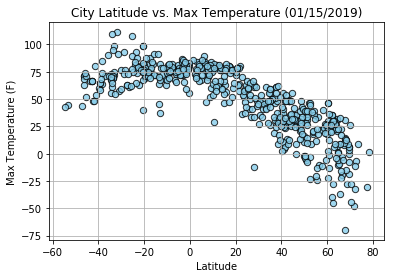

In [12]:
plt.scatter(city_lat, TempF, s=40, c="skyblue",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (01/15/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('Latitude_vs_Max_Temp')

#### Latitude vs. Humidity Plot

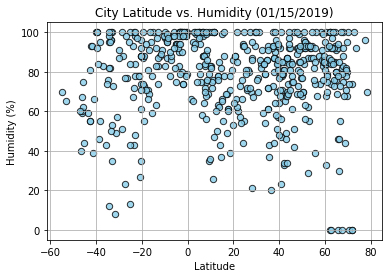

In [13]:
plt.scatter(city_lat, city_humidity, s=40, c="skyblue",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)
plt.grid(True)
plt.title("City Latitude vs. Humidity (01/15/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('Latitude_vs_Humidity')

#### Latitude vs. Cloudiness Plot

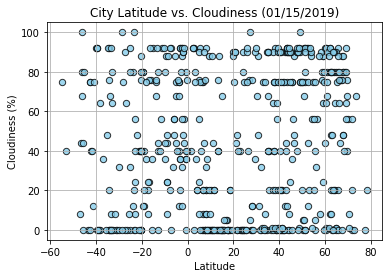

In [14]:
plt.scatter(city_lat, city_clouds, s=40, c="skyblue",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (01/15/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('Latitude_vs_Cloudiness')

#### Latitude vs. Wind Speed Plot

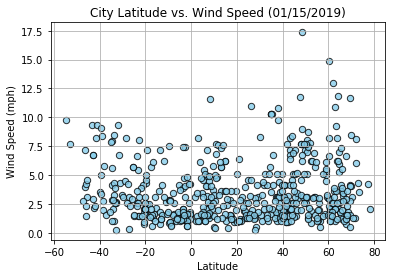

In [15]:
plt.scatter(city_lat, city_wind, s=40, c="skyblue",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (01/15/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('Latitude_vs_WindSpeed')